<a href="https://colab.research.google.com/github/mozz99/wirelessinsite/blob/main/github.com/mozz99/wirelessinsite/blob/main/codigos/read_data_plotmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DADOS SIMULADOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def float_intercept(dados):
  d = dados['Distance(m)']
  pl = dados['Path_Loss(dB)']

# pl = prx

  # Cálculo Beta
  logd = 10 * np.log10(d)
  b = (np.sum(logd)) ** 2
  a = np.sum(logd ** 2)
  denbeta = a - (b / len(logd))
  numbeta = np.sum((logd * pl)) - ((np.sum(logd) * np.sum(pl)) / len(logd))
  beta = numbeta / denbeta

  # Cálculo alfa
  y = np.sum(pl) / len(pl)
  x = np.sum(logd) / len(logd)
  alfa = y - beta * x

  # Float Intercept
  fi = alfa + 10 * beta * np.log10(d)

  # Cálculo do Erro Quadrático Médio (MSE)
  MSE = np.sqrt(np.sum((pl - fi) ** 2) / len(pl))
  print("Rmse: ",MSE)
  return fi

def close_in(dados):
  d0 = 1  # Distância de referência em metros

  y = (3 * 10 ** 8) / (3.5 * 10 ** 9)

  # Separando as colunas
  d = dados['Distance(m)']
  pt = 51
  L = dados['Path_Loss(dB)']


  # Definição das variáveis de entrada
  d0 = 1
  prxo = pt - L[0]

  Lo = 20 * np.log10((4 * np.pi) / y)  # path loss da primeira medida
  D = 10 * np.log10(d / d0)
  D = np.array(D)
  n = np.linalg.lstsq(D.reshape(-1, 1), (L - Lo), rcond=None)[0]  # regressão linear

  # Cálculo da potência do sinal recebido
  ci = 20 * np.log10((4 * np.pi * d0) / y) + 10 * n[0] * np.log10(d / d0)
  MSE = np.sqrt(np.sum((L - ci) ** 2) / len(L))
  print("Rmse: ",MSE)
  print("PLE: ", n[0])
  return ci

def plot_model(model_1,model_2,dados):
  d = dados['Distance(m)']
  pl = dados['Path_Loss(dB)']

  plt.figure(figsize=(12,6))
  plt.plot(d, model_1,'-b', label=f'modelo fi')
  plt.plot(d,model_2,'-r',label='modelo ci')
  plt.scatter(d, pl,label='dados medidos')  # Use 'o-' para plotar pontos conectados por linhas
  plt.grid(True)
  plt.xticks(np.arange(17, 40, step=1))
  plt.xlabel('Distância (m)')
  plt.ylabel('Path Loss (dB)')
  plt.title('Modelos de Propagação ci x fi rota x')
  plt.legend()
  plt.show()

def diferença_sim_real(medidor1,simulador1,medidor2,simulador2):
  a = np.arange(18.0991,38.8226,0.58)
  b = np.arange(19.0286, 39.2583,0.75)
  simulador1['Distance(m)'],medidor1['Distance(m)'] = a,a
  #simulador2['Distance(m)'],medidor2['Distance(m)'] = b,b
  simulador2['Distance(m)'],medidor2['Distance(m)'] = a,a
  MSE_1 = np.sqrt(np.sum((medidor1['Path_Loss(dB)'] - simulador1['Path_Loss(dB)']) ** 2) / len(a))
  MSE_2 = np.sqrt(np.sum((medidor2['Path_Loss(dB)'] - simulador2['Path_Loss(dB)']) ** 2) / len(b))
  return MSE_1,MSE_2

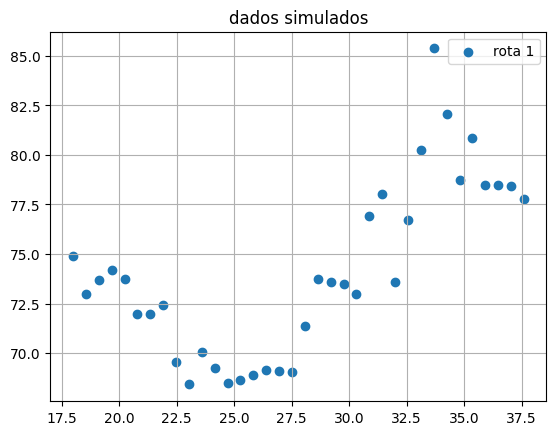

In [3]:
# URL do conjunto de dados
#sim_r1 = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/rota1directional'
sim_r1 = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/rota1directional1'
sim_r2 = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/rota1horn1'
# Carregar o arquivo de texto usando o separador padrão (espaço)
convert1 = pd.read_csv(sim_r1, sep='\s+')
convert2 = pd.read_csv(sim_r2, sep='\s+')

# Salvar DataFrame como CSV
convert1.to_csv('arquivo_convertido1.csv', index=False)
convert2.to_csv('arquivo_convertido2.csv', index=False)

simur1 = pd.read_csv('/content/arquivo_convertido1.csv')
simur2 = pd.read_csv('/content/arquivo_convertido2.csv')

simur1['Distance(m)'] = simur1['Distance(m)'] + 18
simur2['Distance(m)'] = simur2['Distance(m)'] + 19

plt.scatter(simur1['Distance(m)'],simur1['Path_Loss(dB)'],label='rota 1')
#plt.scatter(simur2['Distance(m)'],simur2['Path_Loss(dB)'],label='rota 2')
plt.legend()
plt.title('dados simulados')
plt.grid()

In [12]:
model_fi_r1 = float_intercept(simur1)
model_ci_r1 = close_in(simur1)

Rmse:  3.4476949360315596
Rmse:  3.495340161029185
PLE:  2.138246233554113


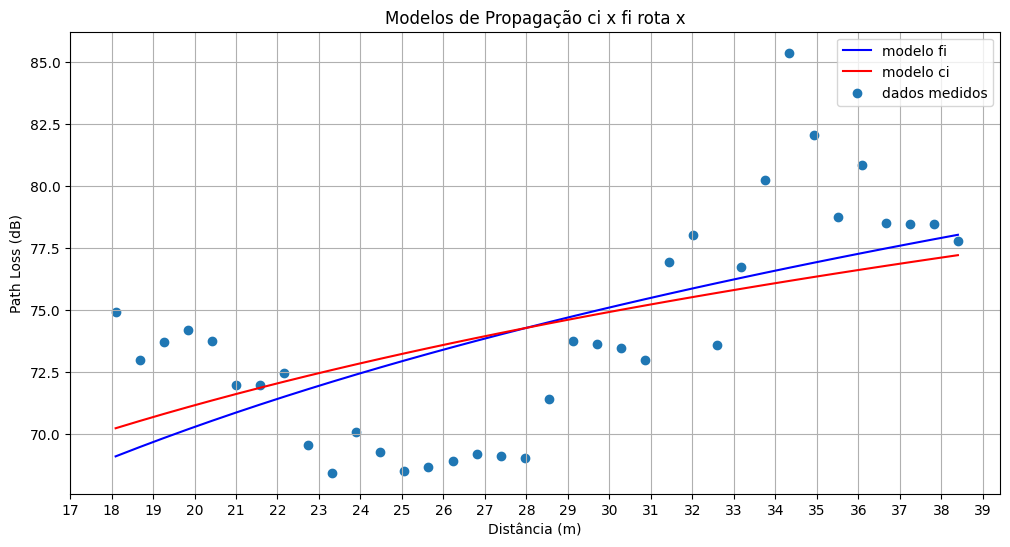

In [13]:
plot_model(model_fi_r1,model_ci_r1,simur1)


Rmse:  3.395572853588872
Rmse:  3.534686995527388
PLE:  2.16429618743262


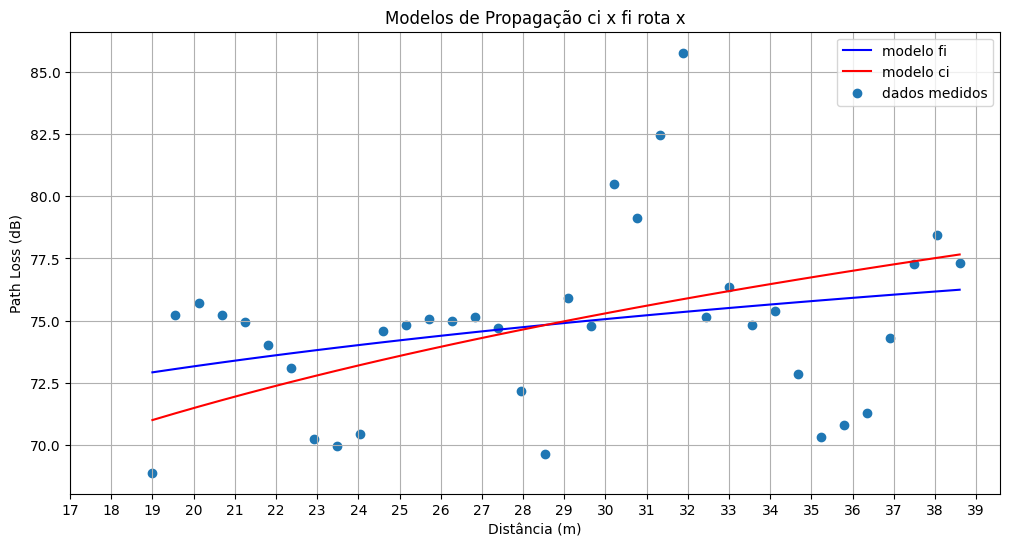

In [6]:
model_fi_r1 = float_intercept(simur2)
model_ci_r1 = close_in(simur2)
plot_model(model_fi_r1,model_ci_r1,simur2)

DADOS MEDIDOS

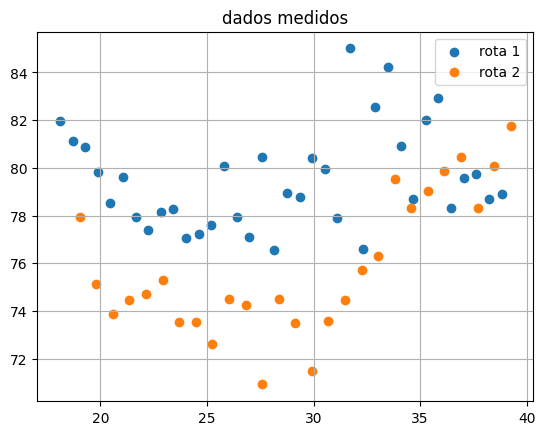

In [7]:
url_rota1 = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/PL_Rota1_VV.txt'
url_rota2 = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/PL_Rota2_VV.txt'
# Carregar o arquivo de texto usando o separador padrão (espaço)
convert1 = pd.read_csv(url_rota1, sep='\s+')
convert2 = pd.read_csv(url_rota2, sep='\s+')

# Salvar DataFrame como CSV
convert1.to_csv('medido1.csv', index=False)
convert2.to_csv('medido2.csv', index=False)

medidor1 = pd.read_csv('/content/medido1.csv')
medidor2 = pd.read_csv('/content/medido2.csv')
#medidor1.loc[29]['Distance(m)'] = 35.2699

plt.scatter(medidor1['Distance(m)'],medidor1['Path_Loss(dB)'],label='rota 1')
plt.scatter(medidor2['Distance(m)'],medidor2['Path_Loss(dB)'],label='rota 2')
plt.legend()
plt.title('dados medidos')
plt.grid()

MODELOS COM DADOS MEDIDOS

Rmse:  2.027079383075229
Rmse:  2.3246871940047367
Rmse:  2.9213634167113196
PLE:  2.4958409024427652
Rmse:  2.360860846415151
PLE:  2.2335596146621963


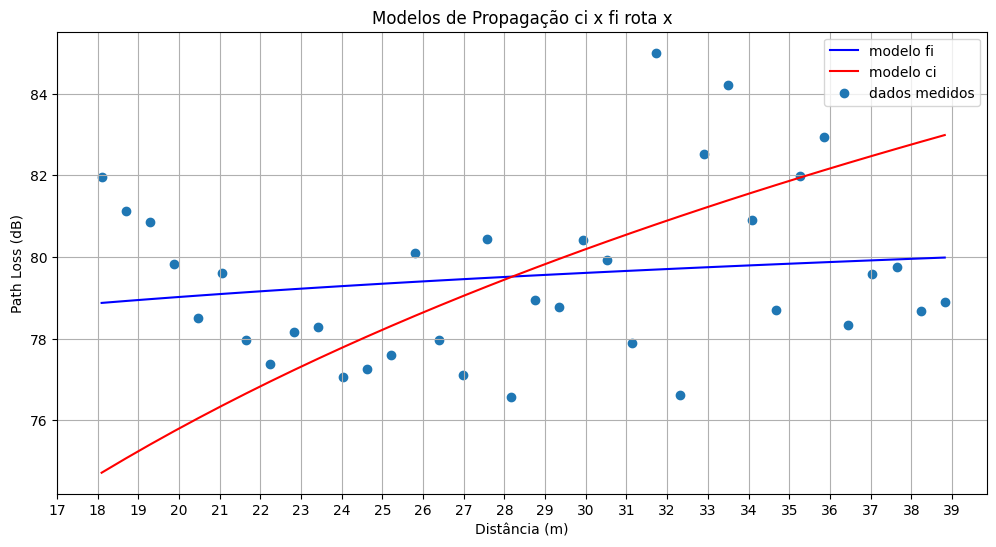

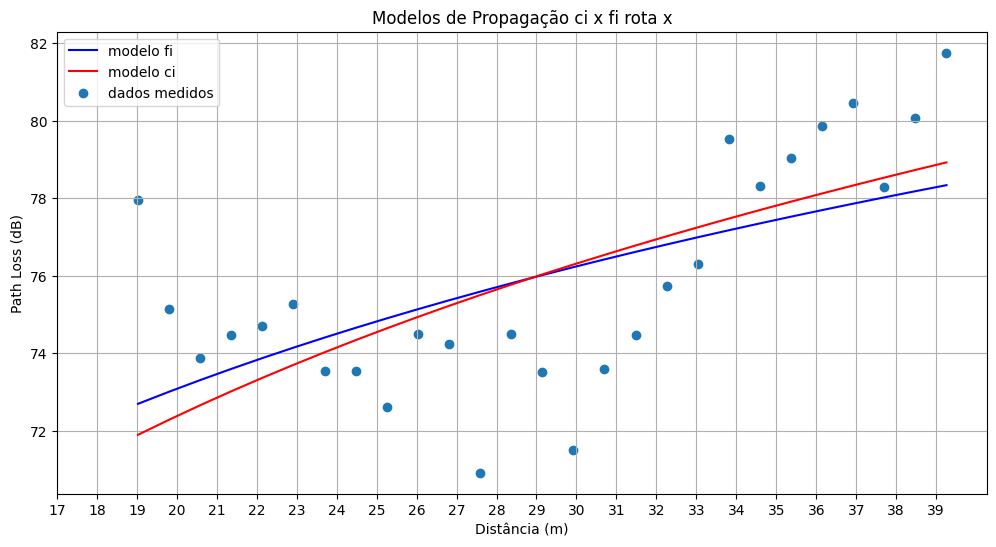

In [ ]:
fi_medr1 = float_intercept(medidor1)
fi_medr2 = float_intercept(medidor2)
ci_medr1 = close_in(medidor1)
ci_medr2 = close_in(medidor2)

plot_model(fi_medr1,ci_medr1,medidor1)
plot_model(fi_medr2,ci_medr2,medidor2)

In [15]:
diferença_sim_real(simur1,medidor1,simur2,medidor1)

(6.7529343149848575, 6.899589421627713)

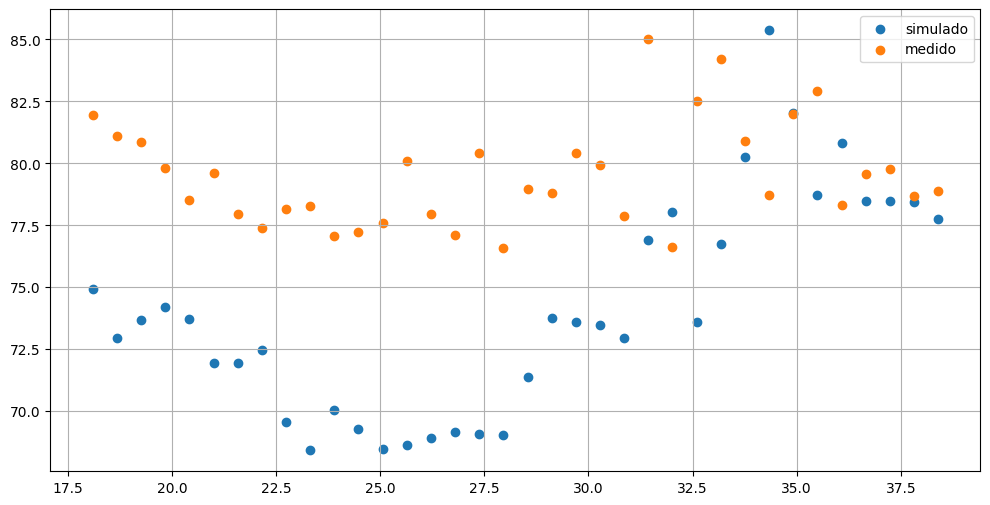

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(simur1['Distance(m)'],simur1['Path_Loss(dB)'],label='simulado')
plt.scatter(medidor1['Distance(m)'],medidor1['Path_Loss(dB)'],label='medido')
plt.legend()
plt.grid()

20.72475814092893